In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
# The statistical module used to run chi square test
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib

In [57]:
weather_df = pd.read_csv("../Resources/weatherdatacsv.csv")
weather_df["Temp"]=pd.to_numeric(weather_df["Temp"], errors='coerce')
weather_df = weather_df.dropna()

In [3]:
death_df = pd.read_csv("../Resources/masterdeathfilenew.csv")
death_df.head()


,County,Month,Year,Deaths,AgeGroup
0,Hennepin,1,2007,11,1
1,Hennepin,5,2007,11,1
2,Hennepin,6,2007,11,1
3,Hennepin,7,2007,11,1
4,Hennepin,10,2007,13,1


In [4]:
left_key=["County", "Year", "Month"]
right_key = ["County", "Year", "Month"]
result_df=death_df.merge(weather_df, left_on=left_key, right_on=right_key, how='inner')
result_df.head()
#result_df.to_csv("resultsfile.csv")

,County,Month,Year,Deaths,AgeGroup,City,Temp
0,Hennepin,1,2007,11,1,Minneapolis,19.6
1,Hennepin,1,2007,10,15-24,Minneapolis,19.6
2,Hennepin,1,2007,16,35-44,Minneapolis,19.6
3,Hennepin,1,2007,52,45-54,Minneapolis,19.6
4,Hennepin,1,2007,83,55-64,Minneapolis,19.6


In [89]:
#Counties: Hennepin, St Louis (Duluth), Freeborn (Albert Lea), Clay(Moorhead)
group1=result_df.loc[(result_df["AgeGroup"]=="85+") & (result_df["County"]=="Hennepin"),:]
group2 = result_df.loc[(result_df["AgeGroup"]=="75-84") & (result_df["County"]=="Hennepin"),:]
group3 = result_df.loc[(result_df["AgeGroup"]=="65-74") & (result_df["County"]=="Hennepin"),:]
group4 = result_df.loc[(result_df["AgeGroup"]=="55-64") & (result_df["County"]=="Hennepin"),:]
group5 = result_df.loc[(result_df["AgeGroup"]=="45-54") & (result_df["County"]=="Hennepin"),:]
group6 = result_df.loc[(result_df["AgeGroup"]=="35-44") & (result_df["County"]=="Hennepin"),:]
group7 = result_df.loc[(result_df["AgeGroup"]=="25-34") & (result_df["County"]=="Hennepin"),:]
group8 = result_df.loc[(result_df["AgeGroup"]=="15-24") & (result_df["County"]=="Hennepin"),:]
group1.head()

,County,Month,Year,Deaths,AgeGroup,City,Temp
7,Hennepin,1,2007,263,85+,Minneapolis,19.6
16,Hennepin,5,2007,195,85+,Minneapolis,64.1
23,Hennepin,6,2007,197,85+,Minneapolis,72.7
30,Hennepin,7,2007,248,85+,Minneapolis,76.0
38,Hennepin,10,2007,246,85+,Minneapolis,54.3


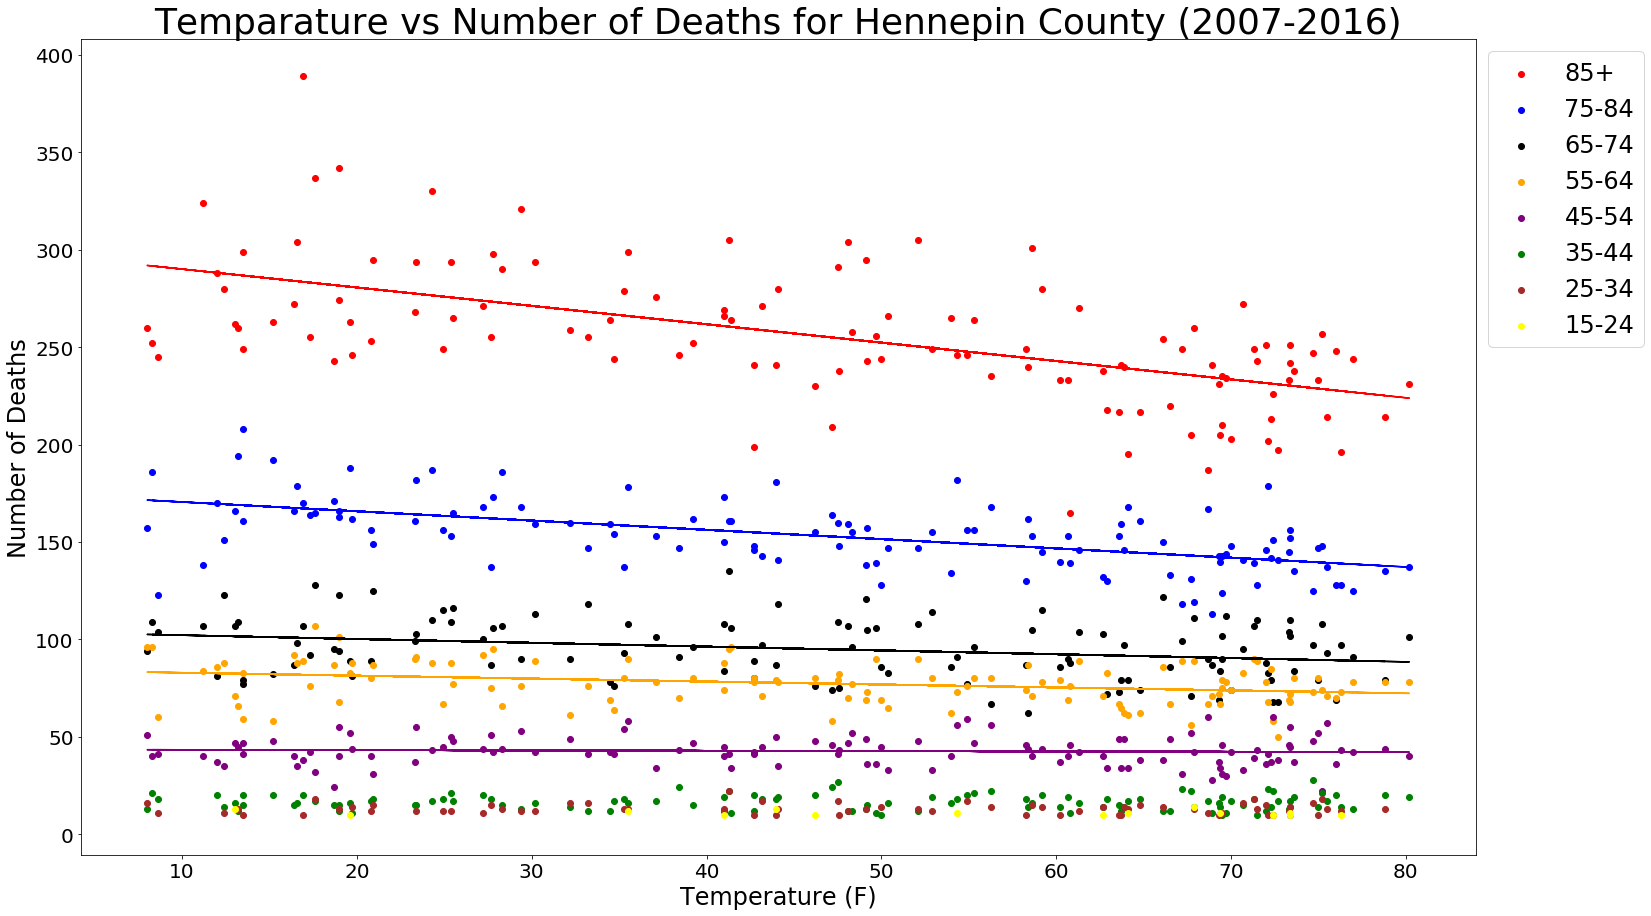

In [90]:
plt.figure(figsize=(25,15))
plt.scatter(x=group1["Temp"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Temp"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Temp"], y=group3["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group4["Temp"], y=group4["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group5["Temp"], y=group5["Deaths"], color = "purple",label = "45-54")
plt.scatter(x=group6["Temp"], y=group6["Deaths"], color = "green",label = "35-44")
plt.scatter(x=group7["Temp"], y=group7["Deaths"], color = "brown",label = "25-34")
plt.scatter(x=group8["Temp"], y=group8["Deaths"], color = "yellow",label = "15-24")
(slope1, intercept1, residual1, pvalue1, stderr1) = linregress(group1["Temp"], group1["Deaths"])
fit1 = slope1 * group1["Temp"] + intercept1
plt.plot(group1["Temp"], fit1, 'red', label="_nolegend_")
(slope2, intercept2, residual2, pvalue2, stderr2) = linregress(group2["Temp"], group2["Deaths"])
fit2 = slope2 * group2["Temp"] + intercept2
plt.plot(group2["Temp"], fit2, 'blue', label="_nolegend_")
(slope3, intercept3, residual3, pvalue3, stderr3) = linregress(group3["Temp"], group3["Deaths"])
fit3 = slope3 * group3["Temp"] + intercept3
plt.plot(group3["Temp"], fit3, 'black', label="_nolegend_")
(slope4, intercept4, residual4, pvalue4, stderr4) = linregress(group4["Temp"], group4["Deaths"])
fit4 = slope4 * group4["Temp"] + intercept4
plt.plot(group4["Temp"], fit4, 'orange', label="_nolegend_")
(slope5, intercept5, residual5, pvalue5, stderr5) = linregress(group5["Temp"], group5["Deaths"])
fit5 = slope5 * group5["Temp"] + intercept5
plt.plot(group5["Temp"], fit5, 'purple', label="_nolegend_")
matplotlib.rc('xtick', labelsize=20)
plt.xlabel("Temperature (F)", fontsize=24)
matplotlib.rc('ytick', labelsize=20)
plt.ylabel("Number of Deaths", fontsize=24)
plt.title("Temparature vs Number of Deaths for Hennepin County (2007-2016)", fontsize=36)
plt.legend(bbox_to_anchor=(1, 1), fontsize=24)
#plt.savefig("../Images/FreebornByAge.png")
plt.show()

In [91]:
print(f"P-value for 85+: {pvalue1} R-squared: {residual1**2}")
print(f"P-value for 75-84: {pvalue2} R-squared: {residual2**2}")
print(f"P-value for 65-74: {pvalue3} R-squared: {residual3**2}")
print(f"P-value for 55-64: {pvalue4} R-squared: {residual4**2}")
print(f"P-value for 45-54: {pvalue5} R-squared: {residual5**2}")

P-value for 85+: 1.886558866378881e-12 R-squared: 0.34429756228333286
P-value for 75-84: 3.4828548941288334e-12 R-squared: 0.33755432034155414
P-value for 65-74: 0.0023463837076098293 R-squared: 0.0757542842517143
P-value for 55-64: 0.000675787745056909 R-squared: 0.0936533423942036
P-value for 45-54: 0.5945932837497039 R-squared: 0.002407523792028792


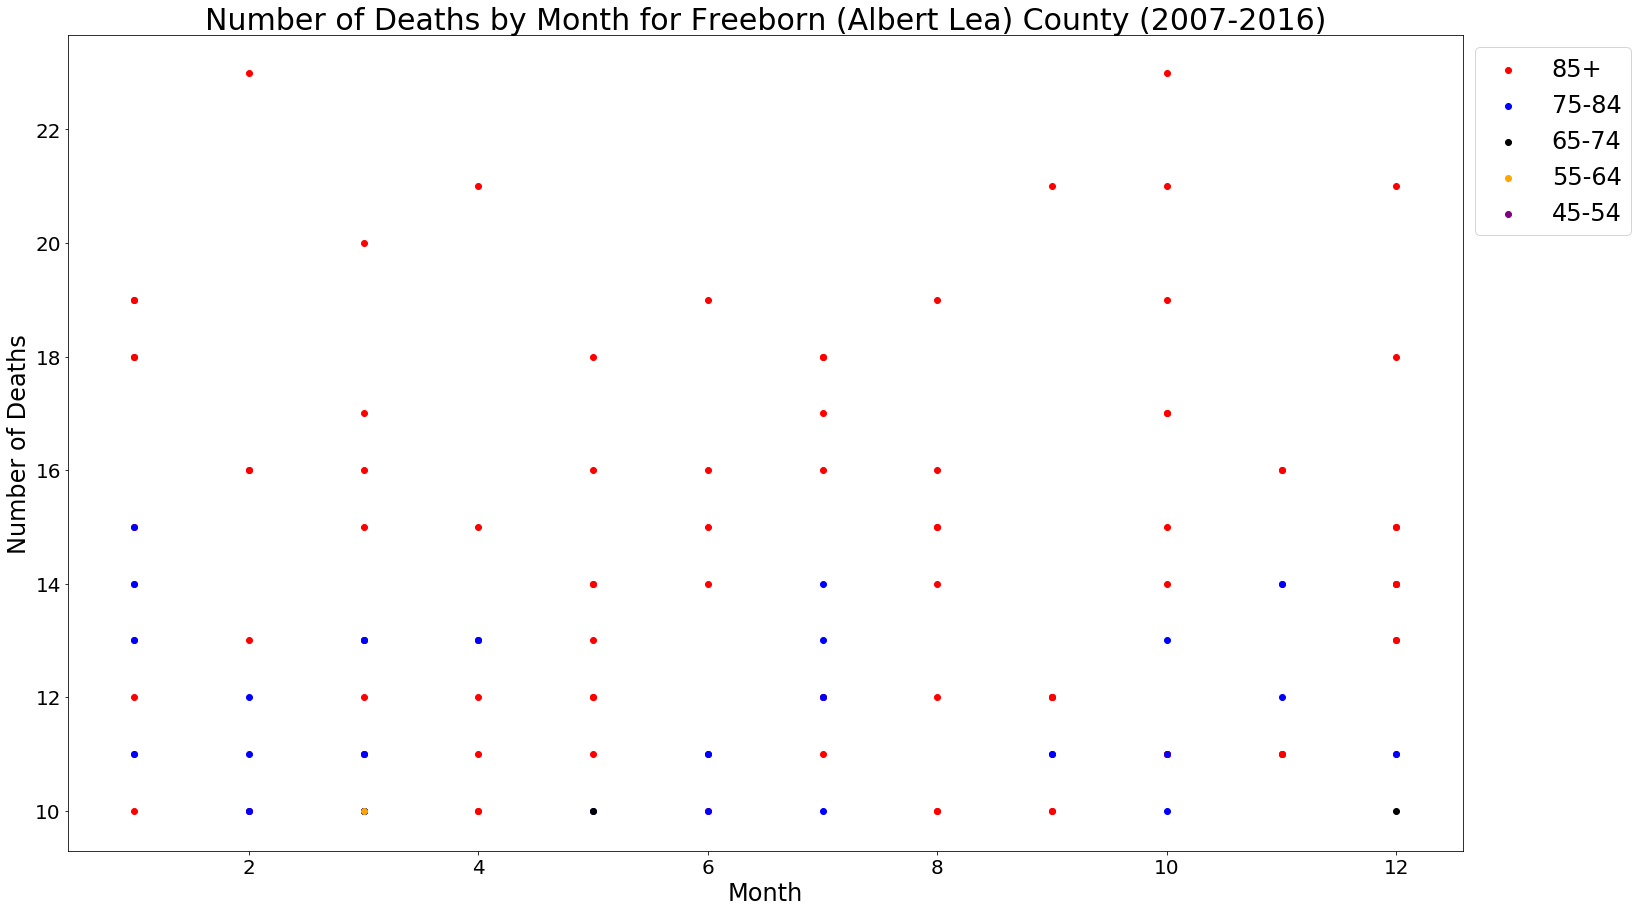

In [84]:
plt.figure(figsize=(25,15))
plt.scatter(x=group1["Month"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Month"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Month"], y=group3["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group4["Month"], y=group4["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group5["Month"], y=group5["Deaths"], color = "purple",label = "45-54")
#plt.scatter(x=group6["Month"], y=group6["Deaths"], color = "green",label = "35-44")
#plt.scatter(x=group7["Month"], y=group7["Deaths"], color = "brown",label = "25-34")
#plt.scatter(x=group8["Month"], y=group8["Deaths"], color = "yellow",label = "15-24")
matplotlib.rc('xtick', labelsize=20)
plt.xlabel("Month", fontsize=24)
matplotlib.rc('ytick', labelsize=20)
plt.ylabel("Number of Deaths", fontsize=24)
plt.title("Number of Deaths by Month for Hennepin County (2007-2016)", fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), fontsize=24)
#plt.savefig("../Images/FreebornByMonth.png")
plt.show()

In [85]:
mn_temp= weather_df.groupby(["Year", "Month"], as_index=False)["Temp"].mean()
mn_death= death_df.groupby(["Year", "Month","AgeGroup"], as_index=False)["Deaths"].sum()
left_key=["Year", "Month"]
right_key = ["Year", "Month"]
mn_df=mn_death.merge(mn_temp, on = ["Year", "Month"], how='inner')
mn_df.head()

,Year,Month,AgeGroup,Deaths,Temp
0,2007,1,1,22,16.822222
1,2007,1,15-24,10,16.822222
2,2007,1,35-44,16,16.822222
3,2007,1,45-54,107,16.822222
4,2007,1,55-64,197,16.822222


In [86]:
group10=mn_df.loc[(mn_df["AgeGroup"]=="85+"),:]
group20 = mn_df.loc[(mn_df["AgeGroup"]=="75-84"),:]
group30 = mn_df.loc[(mn_df["AgeGroup"]=="65-74"),:]
group40 = mn_df.loc[(mn_df["AgeGroup"]=="55-64"),:]
group50 = mn_df.loc[(mn_df["AgeGroup"]=="45-54"),:]
group60 = mn_df.loc[(mn_df["AgeGroup"]=="35-44"),:]
group70 = mn_df.loc[(mn_df["AgeGroup"]=="25-34"),:]
group80 = mn_df.loc[(mn_df["AgeGroup"]=="15-24"),:]

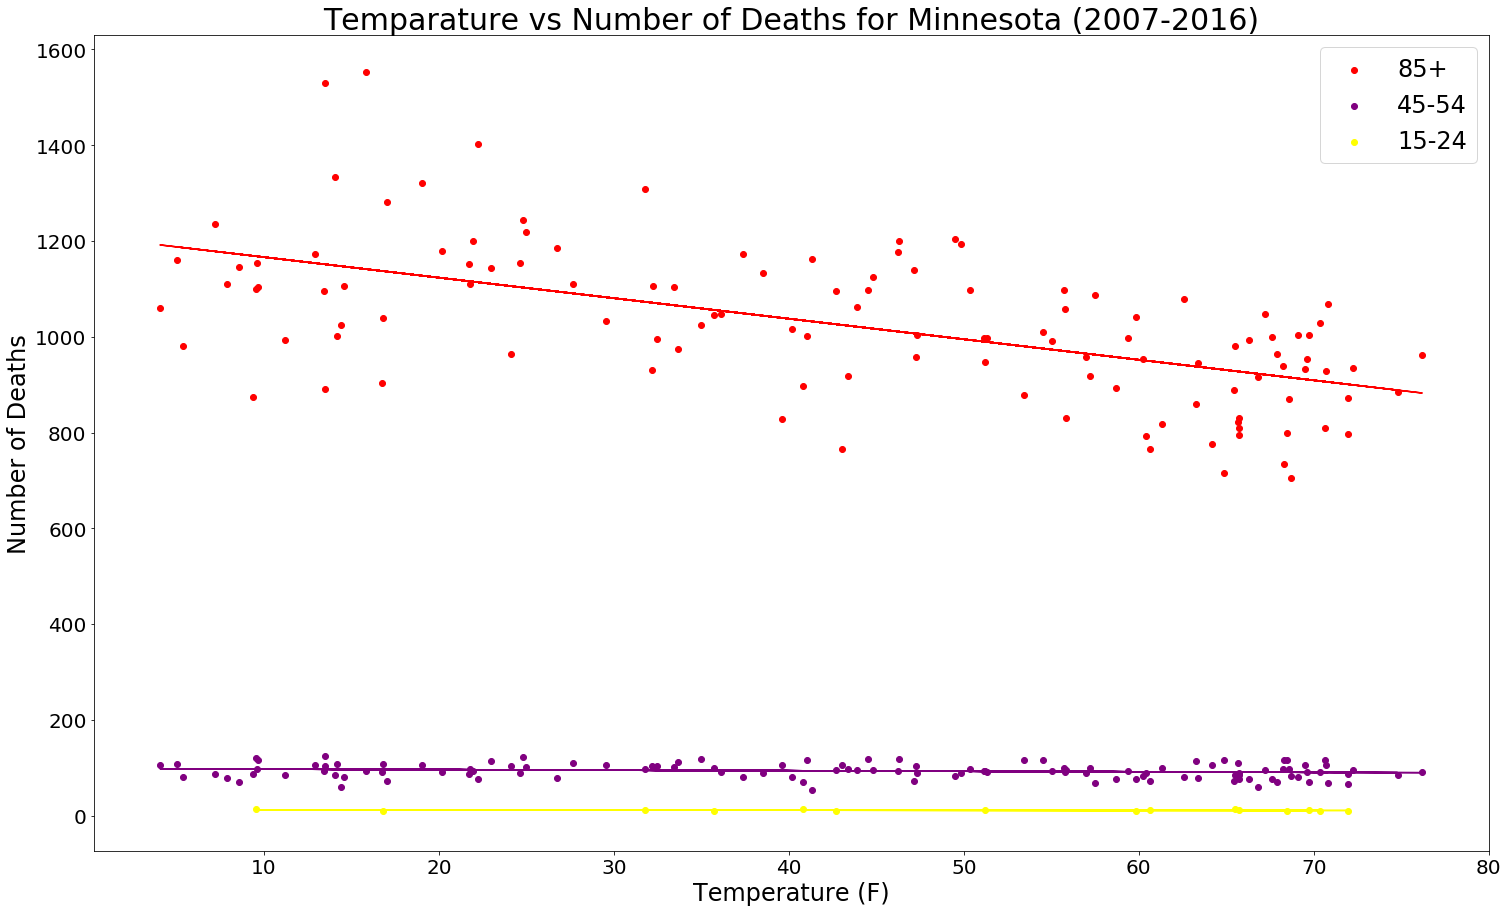

In [93]:
plt.figure(figsize=(25,15))
plt.scatter(x=group10["Temp"], y=group10["Deaths"], color = "red", label = "85+")
#plt.scatter(x=group20["Temp"], y=group20["Deaths"], color = "blue",label = "75-84")
#plt.scatter(x=group30["Temp"], y=group30["Deaths"], color = "black",label = "65-74")
#plt.scatter(x=group40["Temp"], y=group40["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group50["Temp"], y=group50["Deaths"], color = "purple",label = "45-54")
#plt.scatter(x=group60["Temp"], y=group60["Deaths"], color = "green",label = "35-44")
#plt.scatter(x=group70["Temp"], y=group70["Deaths"], color = "brown",label = "25-34")
plt.scatter(x=group80["Temp"], y=group80["Deaths"], color = "yellow",label = "15-24")
(slope10, intercept10, residual10, pvalue10, stderr10) = linregress(group10["Temp"], group10["Deaths"])
fit10 = slope10 * group10["Temp"] + intercept10
plt.plot(group10["Temp"], fit10, 'red', label="_nolegend_")
#(slope20, intercept20, residual20, pvalue20, stderr20) = linregress(group20["Temp"], group20["Deaths"])
#fit20 = slope20 * group20["Temp"] + intercept20
#plt.plot(group20["Temp"], fit20, 'blue', label="_nolegend_")
#(slope30, intercept30, residual30, pvalue30, stderr30) = linregress(group30["Temp"], group30["Deaths"])
#fit30 = slope30 * group30["Temp"] + intercept30
#plt.plot(group30["Temp"], fit30, 'black', label="_nolegend_")
#(slope40, intercept40, residual40, pvalue40, stderr40) = linregress(group40["Temp"], group40["Deaths"])
#fit40 = slope40 * group40["Temp"] + intercept40
#plt.plot(group40["Temp"], fit40, 'orange', label="_nolegend_")
(slope50, intercept50, residual50, pvalue50, stderr50) = linregress(group50["Temp"], group50["Deaths"])
fit50 = slope50 * group50["Temp"] + intercept50
plt.plot(group50["Temp"], fit50, 'purple', label="_nolegend_")
(slope80, intercept80, residual80, pvalue80, stderr80) = linregress(group80["Temp"], group80["Deaths"])
fit80 = slope80 * group80["Temp"] + intercept80
plt.plot(group80["Temp"], fit80, 'yellow', label="_nolegend_")
matplotlib.rc('xtick', labelsize=20)
plt.xlabel("Temperature (F)", fontsize=24)
matplotlib.rc('ytick', labelsize=20)
plt.ylabel("Number of Deaths", fontsize=24)
plt.title("Temparature vs Number of Deaths for Minnesota (2007-2016)", fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), fontsize=24)

plt.savefig("../Images/MinnesotaByAgeLimited.png")
plt.show()

In [94]:
print(f"P-value for 85+: {pvalue10} R-squared: {residual10**2}")
#print(f"P-value for 75-84: {pvalue20} R-squared: {residual20**2}")
#print(f"P-value for 65-74: {pvalue30} R-squared: {residual30**2}")
#print(f"P-value for 55-64: {pvalue40} R-squared: {residual40**2}")
print(f"P-value for 45-54: {pvalue50} R-squared: {residual50**2}")
print(f"P-value for 15-24: {pvalue80} R-squared: {residual80**2}")

P-value for 85+: 2.0856397505090483e-12 R-squared: 0.34319867604833865
P-value for 45-54: 0.08409696384542671 R-squared: 0.02507461999547751
P-value for 15-24: 0.4050976116180094 R-squared: 0.0538905580425817


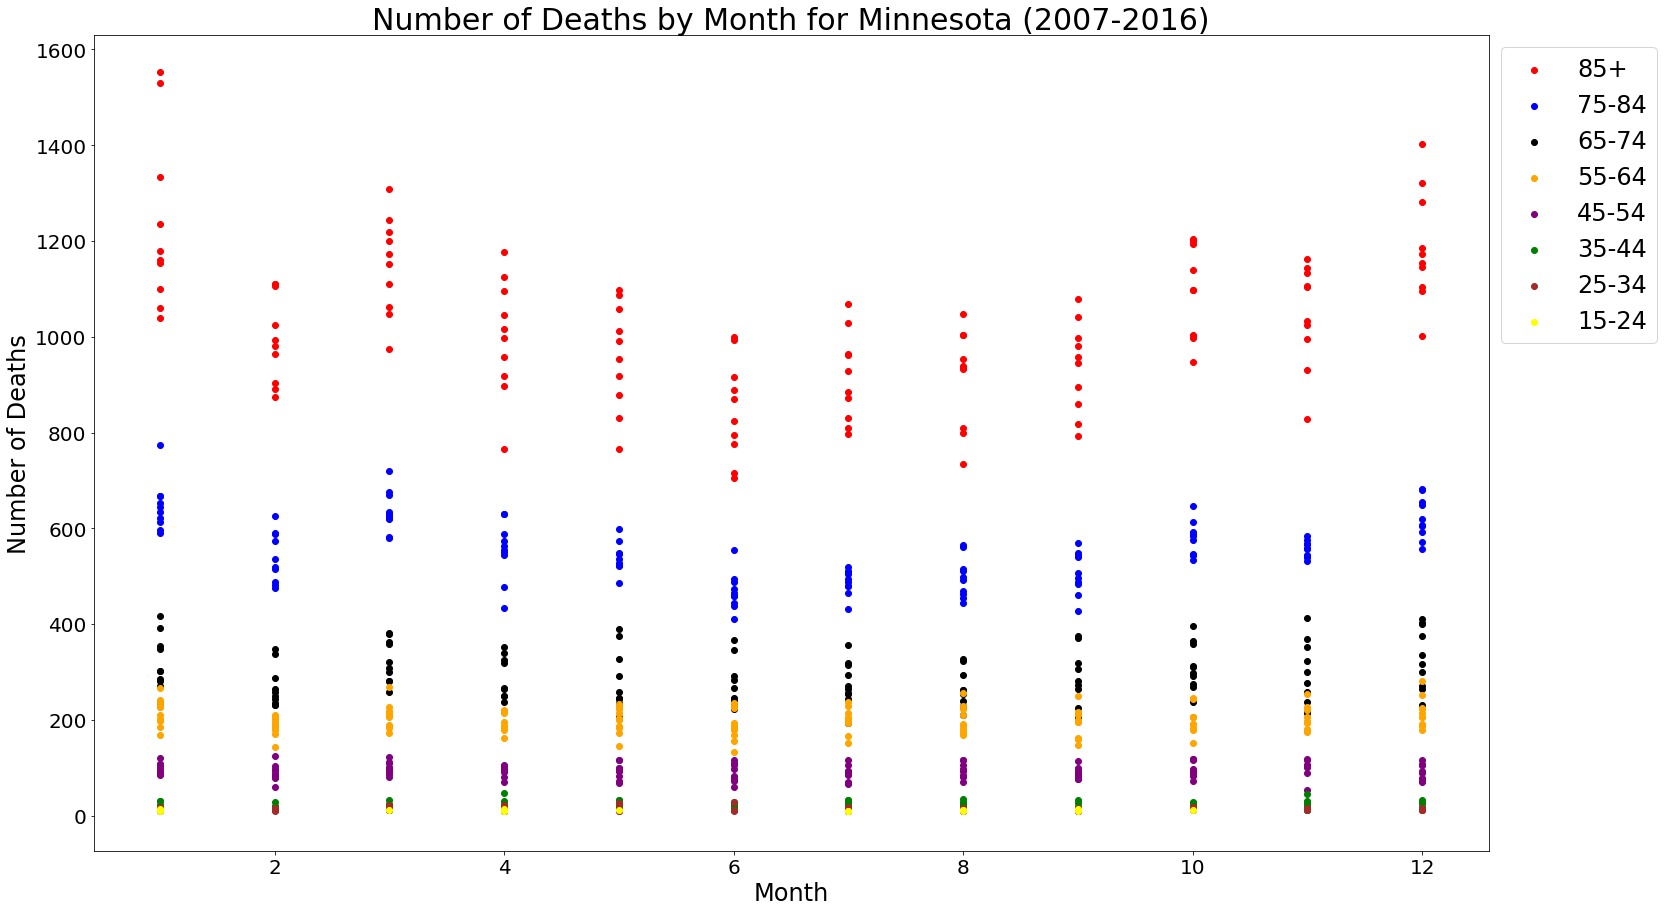

In [68]:
plt.figure(figsize=(25,15))
plt.scatter(x=group10["Month"], y=group10["Deaths"], color = "red", label = "85+")
plt.scatter(x=group20["Month"], y=group20["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group30["Month"], y=group30["Deaths"], color = "black",label = "65-74")
plt.scatter(x=group40["Month"], y=group40["Deaths"], color = "orange",label = "55-64")
plt.scatter(x=group50["Month"], y=group50["Deaths"], color = "purple",label = "45-54")
plt.scatter(x=group60["Month"], y=group60["Deaths"], color = "green",label = "35-44")
plt.scatter(x=group70["Month"], y=group70["Deaths"], color = "brown",label = "25-34")
plt.scatter(x=group80["Month"], y=group80["Deaths"], color = "yellow",label = "15-24")
matplotlib.rc('xtick', labelsize=20)
plt.xlabel("Month", fontsize=24)
matplotlib.rc('ytick', labelsize=20)
plt.ylabel("Number of Deaths", fontsize=24)
plt.title("Number of Deaths by Month for Minnesota (2007-2016)", fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), fontsize=24)

plt.savefig("../Images/MinnesotaByMonth.png")
plt.show()

In [42]:
AgeGroup_df = mn_death.set_index("AgeGroup")
AgeGroup_df.head()

,Year,Month,Deaths
AgeGroup,,,
1,2007,1,22
15-24,2007,1,10
35-44,2007,1,16
45-54,2007,1,107
55-64,2007,1,197


In [43]:
# create monthly death list that aggregates 10 years of data for each month
monthly_death_list = []

jan_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 1,:]
jan_total_deaths = jan_deaths["Deaths"].sum()
monthly_death_list.append(jan_total_deaths)

feb_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 2,:]
feb_total_deaths = feb_deaths["Deaths"].sum()
monthly_death_list.append(feb_total_deaths)

mar_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 3,:]
mar_total_deaths = mar_deaths["Deaths"].sum()
monthly_death_list.append(mar_total_deaths)

apr_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 4,:]
apr_total_deaths = apr_deaths["Deaths"].sum()
monthly_death_list.append(apr_total_deaths)

may_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 5,:]
may_total_deaths = may_deaths["Deaths"].sum()
monthly_death_list.append(may_total_deaths)

june_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 6,:]
june_total_deaths = june_deaths["Deaths"].sum()
monthly_death_list.append(june_total_deaths)

july_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 7,:]
july_total_deaths = july_deaths["Deaths"].sum()
monthly_death_list.append(july_total_deaths)

aug_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 8,:]
aug_total_deaths = aug_deaths["Deaths"].sum()
monthly_death_list.append(aug_total_deaths)

sep_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 9,:]
sep_total_deaths = sep_deaths["Deaths"].sum()
monthly_death_list.append(sep_total_deaths)

oct_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 10,:]
oct_total_deaths = oct_deaths["Deaths"].sum()
monthly_death_list.append(oct_total_deaths)

nov_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 11,:]
nov_total_deaths = nov_deaths["Deaths"].sum()
monthly_death_list.append(nov_total_deaths)

dec_deaths = AgeGroup_df.loc[AgeGroup_df["Month"] == 12,:]
dec_total_deaths = dec_deaths["Deaths"].sum()
monthly_death_list.append(dec_total_deaths)


#monthly_death_list

In [44]:
month_list = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July","Aug", "Sep", "Oct", "Nov","Dec"]
#month_list


In [17]:
deadly_month_df = pd.DataFrame({"Month": month_list, "Total Deaths": monthly_death_list})
deadly_month_df

,Month,Total Deaths
0,Jan,25456
1,Feb,21068
2,Mar,24479
3,Apr,21580
4,May,21069
5,June,18930
6,July,20022
7,Aug,20049
8,Sep,20327
9,Oct,23062


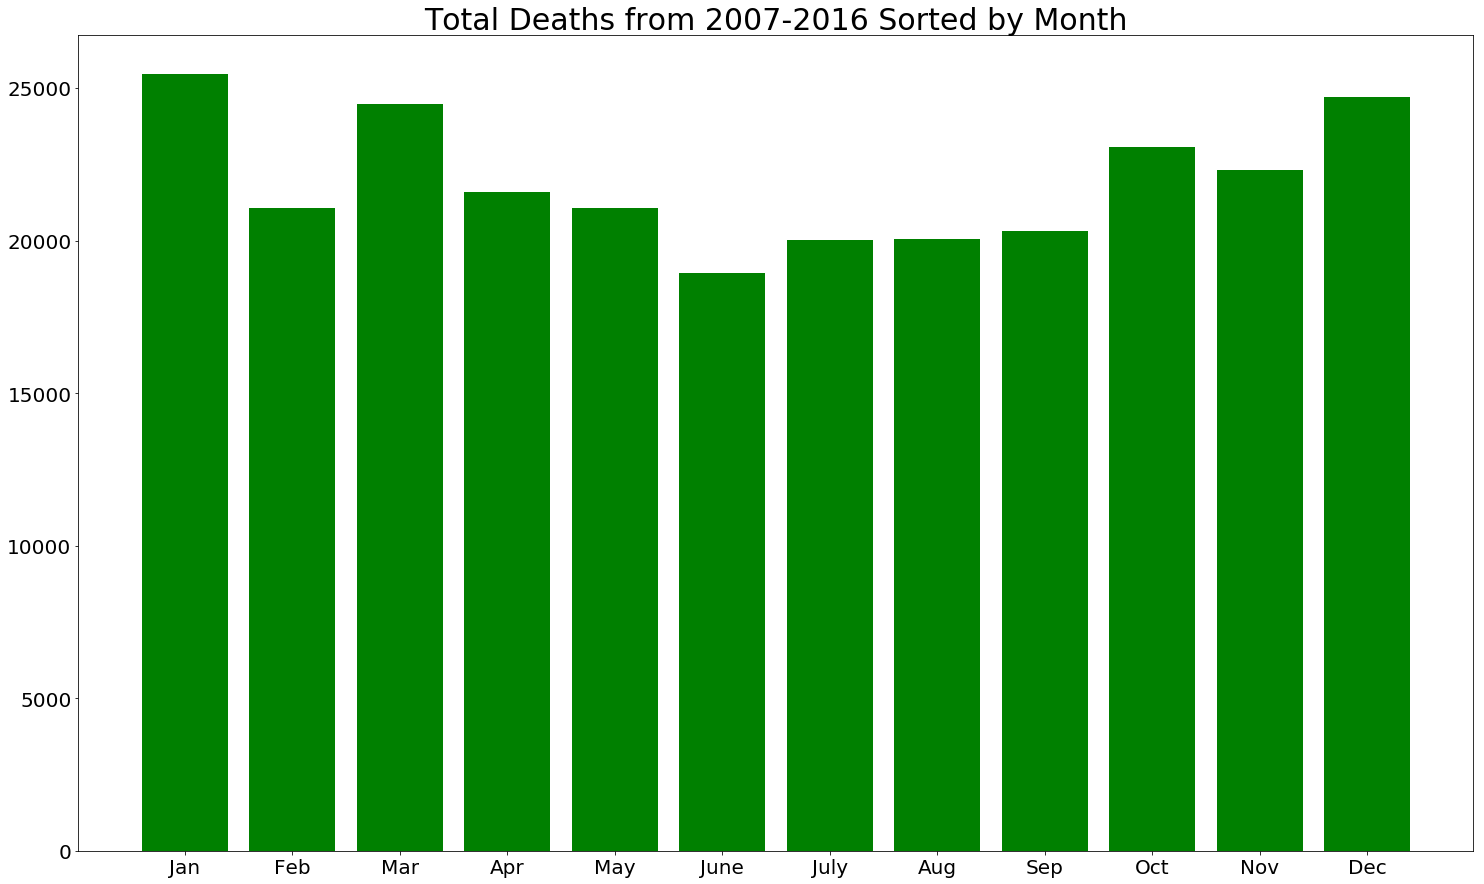

In [59]:
plt.figure(figsize=(25,15))
x_axis = deadly_month_df["Month"]
y_axis = deadly_month_df["Total Deaths"]
plt.bar(x_axis, y_axis, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, deadly_month_df["Month"], fontsize=20)
plt.title("Total Deaths from 2007-2016 Sorted by Month", fontsize=30)
matplotlib.rc('ytick', labelsize=20)
#plt.xlabel("Month", fontsize=24)
#plt.ylabel("Total Deaths", fontsize=24)
#plt.grid()
plt.savefig("../Images/deadliestmonth.png")
plt.show()